### 1. Load History OHCLV 

Download-data: 
`
freqtrade download-data --config user_data/config.json --timeframe 15m --timerange 20240101-20250101
`

File-like:
`
BTC_USDT-15m.feather
`


In [365]:
import pandas as pd 
import os
import re
import warnings
warnings.filterwarnings("ignore")
import sys
sys.path.append('./')

file_path = '/usr/local/services/freqtrade-grid/user_data/data/binance/futures'
time_frame = '1d'

def extract_coin_symbols(directory):
    coin_list = []
    pattern = re.compile(r'(.+?)_USDT-1d-futures\.feather$')

    for filename in os.listdir(directory):
        match = pattern.match(filename)
        if match:
            coin_symbol = (match.group(1)+':USDT').replace('_','/')
            coin_list.append(coin_symbol)
    
    return coin_list


if os.path.exists(file_path) and os.path.isdir(file_path):
    coins = extract_coin_symbols(file_path)
print(len(coins))

393


### 2. Pair Filter

In [366]:
top50 = [
"BTC/USDT:USDT","ETH/USDT:USDT","XRP/USDT:USDT","BNB/USDT:USDT","SOL/USDT:USDT","DOGE/USDT:USDT","TRX/USDT:USDT","ADA/USDT:USDT","SUI/USDT:USDT","HYPE/USDT:USDT","LINK/USDT:USDT","AVAX/USDT:USDT","XLM/USDT:USDT","TON/USDT:USDT","BCH/USDT:USDT","HBAR/USDT:USDT","LTC/USDT:USDT","DOT/USDT:USDT","XMR/USDT:USDT","UNI/USDT:USDT","AAVE/USDT:USDT","TAO/USDT:USDT","NEAR/USDT:USDT","APT/USDT:USDT","ONDO/USDT:USDT","ICP/USDT:USDT","ETC/USDT:USDT","KAS/USDT:USDT","POL/USDT:USDT","TRUMP/USDT:USDT","VET/USDT:USDT","RENDER/USDT:USDT","ENA/USDT:USDT","FET/USDT:USDT","WLD/USDT:USDT","ARB/USDT:USDT","FIL/USDT:USDT"
]

top100 = [
"BTC/USDT:USDT","ETH/USDT:USDT","XRP/USDT:USDT","BNB/USDT:USDT","SOL/USDT:USDT","DOGE/USDT:USDT","TRX/USDT:USDT","ADA/USDT:USDT","SUI/USDT:USDT","HYPE/USDT:USDT","LINK/USDT:USDT","AVAX/USDT:USDT","XLM/USDT:USDT","TON/USDT:USDT","BCH/USDT:USDT","HBAR/USDT:USDT","LTC/USDT:USDT","DOT/USDT:USDT","XMR/USDT:USDT","UNI/USDT:USDT","AAVE/USDT:USDT","TAO/USDT:USDT","NEAR/USDT:USDT","APT/USDT:USDT","ONDO/USDT:USDT","ICP/USDT:USDT","ETC/USDT:USDT","KAS/USDT:USDT","POL/USDT:USDT","TRUMP/USDT:USDT","VET/USDT:USDT","RENDER/USDT:USDT","ENA/USDT:USDT","FET/USDT:USDT","WLD/USDT:USDT","ARB/USDT:USDT","FIL/USDT:USDT","ATOM/USDT:USDT","ALGO/USDT:USDT","JUP/USDT:USDT","TIA/USDT:USDT","VIRTUAL/USDT:USDT","INJ/USDT:USDT","QNT/USDT:USDT","STX/USDT:USDT","S/USDT:USDT","DEXE/USDT:USDT","OP/USDT:USDT","FARTCOIN/USDT:USDT","IP/USDT:USDT","FORM/USDT:USDT","SEI/USDT:USDT","A/USDT:USDT","SPX/USDT:USDT","IMX/USDT:USDT","WIF/USDT:USDT","GRT/USDT:USDT","CRV/USDT:USDT","LDO/USDT:USDT","ZEC/USDT:USDT","ENS/USDT:USDT","JASMY/USDT:USDT","THETA/USDT:USDT","CAKE/USDT:USDT","GALA/USDT:USDT","WAL/USDT:USDT","SAND/USDT:USDT","IOTA/USDT:USDT","PYTH/USDT:USDT","PENGU/USDT:USDT","BSV/USDT:USDT","PENDLE/USDT:USDT","KAIA/USDT:USDT"
]

top150 = [
"BTC/USDT:USDT","ETH/USDT:USDT","XRP/USDT:USDT","BNB/USDT:USDT","SOL/USDT:USDT","DOGE/USDT:USDT","TRX/USDT:USDT","ADA/USDT:USDT","SUI/USDT:USDT","HYPE/USDT:USDT","LINK/USDT:USDT","AVAX/USDT:USDT","XLM/USDT:USDT","TON/USDT:USDT","BCH/USDT:USDT","HBAR/USDT:USDT","LTC/USDT:USDT","DOT/USDT:USDT","XMR/USDT:USDT","UNI/USDT:USDT","AAVE/USDT:USDT","TAO/USDT:USDT","NEAR/USDT:USDT","APT/USDT:USDT","ONDO/USDT:USDT","ICP/USDT:USDT","ETC/USDT:USDT","KAS/USDT:USDT","POL/USDT:USDT","TRUMP/USDT:USDT","VET/USDT:USDT","RENDER/USDT:USDT","ENA/USDT:USDT","FET/USDT:USDT","WLD/USDT:USDT","ARB/USDT:USDT","FIL/USDT:USDT","ATOM/USDT:USDT","ALGO/USDT:USDT","JUP/USDT:USDT","TIA/USDT:USDT","VIRTUAL/USDT:USDT","INJ/USDT:USDT","QNT/USDT:USDT","STX/USDT:USDT","S/USDT:USDT","DEXE/USDT:USDT","OP/USDT:USDT","FARTCOIN/USDT:USDT","IP/USDT:USDT","FORM/USDT:USDT","SEI/USDT:USDT","A/USDT:USDT","SPX/USDT:USDT","IMX/USDT:USDT","WIF/USDT:USDT","GRT/USDT:USDT","CRV/USDT:USDT","LDO/USDT:USDT","ZEC/USDT:USDT","ENS/USDT:USDT","JASMY/USDT:USDT","THETA/USDT:USDT","CAKE/USDT:USDT","GALA/USDT:USDT","WAL/USDT:USDT","SAND/USDT:USDT","IOTA/USDT:USDT","PYTH/USDT:USDT","PENGU/USDT:USDT","BSV/USDT:USDT","PENDLE/USDT:USDT","KAIA/USDT:USDT","XTZ/USDT:USDT","RUNE/USDT:USDT","FLOW/USDT:USDT","BRETT/USDT:USDT","ZKJ/USDT:USDT","JTO/USDT:USDT","XCN/USDT:USDT","MANA/USDT:USDT","APE/USDT:USDT","KAITO/USDT:USDT","DEEP/USDT:USDT","ATH/USDT:USDT","GRASS/USDT:USDT","EIGEN/USDT:USDT","EGLD/USDT:USDT","DYDX/USDT:USDT","AR/USDT:USDT","AERO/USDT:USDT","STRK/USDT:USDT","KAVA/USDT:USDT","NEO/USDT:USDT","AXS/USDT:USDT","RSR/USDT:USDT","SUPER/USDT:USDT","LPT/USDT:USDT","ETHFI/USDT:USDT","W/USDT:USDT","CFX/USDT:USDT","SYRUP/USDT:USDT","CHZ/USDT:USDT","MOVE/USDT:USDT","POPCAT/USDT:USDT","MORPHO/USDT:USDT","COMP/USDT:USDT","SAFE/USDT:USDT","SUN/USDT:USDT"
]

top200 = [
"BTC/USDT:USDT","ETH/USDT:USDT","XRP/USDT:USDT","BNB/USDT:USDT","SOL/USDT:USDT","DOGE/USDT:USDT","TRX/USDT:USDT","ADA/USDT:USDT","SUI/USDT:USDT","HYPE/USDT:USDT","LINK/USDT:USDT","AVAX/USDT:USDT","XLM/USDT:USDT","TON/USDT:USDT","BCH/USDT:USDT","HBAR/USDT:USDT","LTC/USDT:USDT","DOT/USDT:USDT","XMR/USDT:USDT","UNI/USDT:USDT","AAVE/USDT:USDT","TAO/USDT:USDT","NEAR/USDT:USDT","APT/USDT:USDT","ONDO/USDT:USDT","ICP/USDT:USDT","ETC/USDT:USDT","KAS/USDT:USDT","POL/USDT:USDT","TRUMP/USDT:USDT","VET/USDT:USDT","RENDER/USDT:USDT","ENA/USDT:USDT","FET/USDT:USDT","WLD/USDT:USDT","ARB/USDT:USDT","FIL/USDT:USDT","ATOM/USDT:USDT","ALGO/USDT:USDT","JUP/USDT:USDT","TIA/USDT:USDT","VIRTUAL/USDT:USDT","INJ/USDT:USDT","QNT/USDT:USDT","STX/USDT:USDT","S/USDT:USDT","DEXE/USDT:USDT","OP/USDT:USDT","FARTCOIN/USDT:USDT","IP/USDT:USDT","FORM/USDT:USDT","SEI/USDT:USDT","A/USDT:USDT","SPX/USDT:USDT","IMX/USDT:USDT","WIF/USDT:USDT","GRT/USDT:USDT","CRV/USDT:USDT","LDO/USDT:USDT","ZEC/USDT:USDT","ENS/USDT:USDT","JASMY/USDT:USDT","THETA/USDT:USDT","CAKE/USDT:USDT","GALA/USDT:USDT","WAL/USDT:USDT","SAND/USDT:USDT","IOTA/USDT:USDT","PYTH/USDT:USDT","PENGU/USDT:USDT","BSV/USDT:USDT","PENDLE/USDT:USDT","KAIA/USDT:USDT","XTZ/USDT:USDT","RUNE/USDT:USDT","FLOW/USDT:USDT","BRETT/USDT:USDT","ZKJ/USDT:USDT","JTO/USDT:USDT","XCN/USDT:USDT","MANA/USDT:USDT","APE/USDT:USDT","KAITO/USDT:USDT","DEEP/USDT:USDT","ATH/USDT:USDT","GRASS/USDT:USDT","EIGEN/USDT:USDT","EGLD/USDT:USDT","DYDX/USDT:USDT","AR/USDT:USDT","AERO/USDT:USDT","STRK/USDT:USDT","KAVA/USDT:USDT","NEO/USDT:USDT","AXS/USDT:USDT","RSR/USDT:USDT","SUPER/USDT:USDT","LPT/USDT:USDT","ETHFI/USDT:USDT","W/USDT:USDT","CFX/USDT:USDT","SYRUP/USDT:USDT","CHZ/USDT:USDT","MOVE/USDT:USDT","POPCAT/USDT:USDT","MORPHO/USDT:USDT","COMP/USDT:USDT","SAFE/USDT:USDT","SUN/USDT:USDT","TWT/USDT:USDT","JST/USDT:USDT","AKT/USDT:USDT","OM/USDT:USDT","AXL/USDT:USDT","TURBO/USDT:USDT","BERA/USDT:USDT","1INCH/USDT:USDT","MEW/USDT:USDT","MINA/USDT:USDT","KSM/USDT:USDT","AI16Z/USDT:USDT","DASH/USDT:USDT","PNUT/USDT:USDT","ZRO/USDT:USDT","NXPC/USDT:USDT","SFP/USDT:USDT","NOT/USDT:USDT","SNX/USDT:USDT","GLM/USDT:USDT","ROSE/USDT:USDT","ZIL/USDT:USDT","MOCA/USDT:USDT","MASK/USDT:USDT","BLUR/USDT:USDT","QTUM/USDT:USDT","CKB/USDT:USDT","MOODENG/USDT:USDT","ASTR/USDT:USDT","ZK/USDT:USDT","ZRX/USDT:USDT","GAS/USDT:USDT","ORDI/USDT:USDT","BAT/USDT:USDT","VANA/USDT:USDT","ACH/USDT:USDT"
]

copy_all = [
"BTC/USDT:USDT","ETH/USDT:USDT","BNB/USDT:USDT","DOGE/USDT:USDT","SOL/USDT:USDT","XRP/USDT:USDT","1000PEPE/USDT:USDT","1000SHIB/USDT:USDT","AAVE/USDT:USDT","ADA/USDT:USDT","ARB/USDT:USDT","AVAX/USDT:USDT","ENA/USDT:USDT","ETC/USDT:USDT","FIL/USDT:USDT","LINK/USDT:USDT","LTC/USDT:USDT","NEAR/USDT:USDT","SEI/USDT:USDT","SUI/USDT:USDT","WLD/USDT:USDT","XLM/USDT:USDT","TRUMP/USDT:USDT","1000FLOKI/USDT:USDT","1000SATS/USDT:USDT","ACT/USDT:USDT","AERGO/USDT:USDT","APT/USDT:USDT","ATH/USDT:USDT","BABY/USDT:USDT","BANANAS31/USDT:USDT","BANANA/USDT:USDT","BANK/USDT:USDT","BCH/USDT:USDT","BROCCOLI714/USDT:USDT","BROCCOLIF3B/USDT:USDT","BR/USDT:USDT","BTCDOM/USDT:USDT","DEEP/USDT:USDT","DOT/USDT:USDT","EDU/USDT:USDT","EPT/USDT:USDT","FHE/USDT:USDT","FIS/USDT:USDT","FORM/USDT:USDT","FORTH/USDT:USDT","FUN/USDT:USDT","GRASS/USDT:USDT","GUN/USDT:USDT","HBAR/USDT:USDT","HIPPO/USDT:USDT","HMSTR/USDT:USDT","HYPER/USDT:USDT","ICP/USDT:USDT","INIT/USDT:USDT","IP/USDT:USDT","JELLYJELLY/USDT:USDT","JUP/USDT:USDT","KAITO/USDT:USDT","KERNEL/USDT:USDT","LDO/USDT:USDT","MAVIA/USDT:USDT","MEMEFI/USDT:USDT","MKR/USDT:USDT","MLN/USDT:USDT","NKN/USDT:USDT","OM/USDT:USDT","ONDO/USDT:USDT","ORDI/USDT:USDT","PARTI/USDT:USDT","PAXG/USDT:USDT","PERP/USDT:USDT","PLUME/USDT:USDT","PNUT/USDT:USDT","PROMPT/USDT:USDT","PUMP/USDT:USDT","RARE/USDT:USDT","REZ/USDT:USDT","RSR/USDT:USDT","SIREN/USDT:USDT","STO/USDT:USDT","TAO/USDT:USDT","TIA/USDT:USDT","TON/USDT:USDT","TRB/USDT:USDT","TRX/USDT:USDT","TUT/USDT:USDT","UNI/USDT:USDT","VOXEL/USDT:USDT","WAL/USDT:USDT","WCT/USDT:USDT","WIF/USDT:USDT","XCN/USDT:USDT","1000BONK/USDT:USDT","1000CHEEMS/USDT:USDT","1000RATS/USDT:USDT","ACH/USDT:USDT","AI16Z/USDT:USDT","ALCH/USDT:USDT","ALGO/USDT:USDT","APE/USDT:USDT","ARC/USDT:USDT","ARKM/USDT:USDT","AR/USDT:USDT","ATOM/USDT:USDT","AUCTION/USDT:USDT","AXS/USDT:USDT","BAN/USDT:USDT","BERA/USDT:USDT","BLUR/USDT:USDT","BOME/USDT:USDT","CAKE/USDT:USDT","CFX/USDT:USDT","CHZ/USDT:USDT","COW/USDT:USDT","CRV/USDT:USDT","DEXE/USDT:USDT","DOGS/USDT:USDT","DYDX/USDT:USDT","EIGEN/USDT:USDT","ENS/USDT:USDT","EOS/USDT:USDT","ETHFI/USDT:USDT","FARTCOIN/USDT:USDT","FET/USDT:USDT","GALA/USDT:USDT","GMT/USDT:USDT","GOAT/USDT:USDT","GRT/USDT:USDT","INJ/USDT:USDT","IO/USDT:USDT","JTO/USDT:USDT","KAVA/USDT:USDT","LAYER/USDT:USDT","MANA/USDT:USDT","MASK/USDT:USDT","MELANIA/USDT:USDT","ME/USDT:USDT","MOODENG/USDT:USDT","MOVE/USDT:USDT","NEIRO/USDT:USDT","NEIROETH/USDT:USDT","NOT/USDT:USDT","OP/USDT:USDT","PENDLE/USDT:USDT","PENGU/USDT:USDT","PEOPLE/USDT:USDT","POL/USDT:USDT","POPCAT/USDT:USDT","PYTH/USDT:USDT","RENDER/USDT:USDT","RUNE/USDT:USDT","SAND/USDT:USDT","SHELL/USDT:USDT","SOLV/USDT:USDT","STRK/USDT:USDT","STX/USDT:USDT","S/USDT:USDT","SWARMS/USDT:USDT","THE/USDT:USDT","TST/USDT:USDT","TURBO/USDT:USDT","USDC/USDT:USDT","USUAL/USDT:USDT","VANA/USDT:USDT","VET/USDT:USDT","VIRTUAL/USDT:USDT","W/USDT:USDT","ZK/USDT:USDT","ZRO/USDT:USDT","1000000MOG/USDT:USDT","1000CAT/USDT:USDT","1000LUNC/USDT:USDT","1INCH/USDT:USDT","1MBABYDOGE/USDT:USDT","AEVO/USDT:USDT","AGLD/USDT:USDT","AIXBT/USDT:USDT","ALICE/USDT:USDT","ANIME/USDT:USDT","ANKR/USDT:USDT","ARK/USDT:USDT","AXL/USDT:USDT","BAKE/USDT:USDT","BAT/USDT:USDT","BB/USDT:USDT","BEAMX/USDT:USDT","BEL/USDT:USDT","BIGTIME/USDT:USDT","BIO/USDT:USDT","BMT/USDT:USDT","BSV/USDT:USDT","C98/USDT:USDT","CATI/USDT:USDT","CHILLGUY/USDT:USDT","COMP/USDT:USDT","COTI/USDT:USDT","CTSI/USDT:USDT","DASH/USDT:USDT","DENT/USDT:USDT","DF/USDT:USDT","DYM/USDT:USDT","EGLD/USDT:USDT","EPIC/USDT:USDT","FLM/USDT:USDT","FLOW/USDT:USDT","GAS/USDT:USDT","GLM/USDT:USDT","GPS/USDT:USDT","GRIFFAIN/USDT:USDT","GTC/USDT:USDT","HIFI/USDT:USDT","ID/USDT:USDT","IMX/USDT:USDT","IOTA/USDT:USDT","JASMY/USDT:USDT","KAS/USDT:USDT","KOMA/USDT:USDT","KSM/USDT:USDT","LISTA/USDT:USDT","LPT/USDT:USDT","LQTY/USDT:USDT","LUNA2/USDT:USDT","MANTA/USDT:USDT","MEME/USDT:USDT","METIS/USDT:USDT","MEW/USDT:USDT","MINA/USDT:USDT","MOCA/USDT:USDT","MORPHO/USDT:USDT","MUBARAK/USDT:USDT","NEO/USDT:USDT","ONE/USDT:USDT","POLYX/USDT:USDT","QNT/USDT:USDT","QUICK/USDT:USDT","RAYSOL/USDT:USDT","RED/USDT:USDT","ROSE/USDT:USDT","SAFE/USDT:USDT","SAGA/USDT:USDT","SCR/USDT:USDT","SFP/USDT:USDT","SNX/USDT:USDT","SPELL/USDT:USDT","SSV/USDT:USDT","STORJ/USDT:USDT","SUSHI/USDT:USDT","THETA/USDT:USDT","TNSR/USDT:USDT","TWT/USDT:USDT","UXLINK/USDT:USDT","VIC/USDT:USDT","VINE/USDT:USDT","VVV/USDT:USDT","XMR/USDT:USDT","XTZ/USDT:USDT","XVS/USDT:USDT","YFI/USDT:USDT","YGG/USDT:USDT","ZEC/USDT:USDT","ZEN/USDT:USDT","ZEREBRO/USDT:USDT","ZETA/USDT:USDT","ZIL/USDT:USDT","ZRX/USDT:USDT","1000WHY/USDT:USDT","1000XEC/USDT:USDT","1000X/USDT:USDT","ACE/USDT:USDT","ACX/USDT:USDT","AERO/USDT:USDT","AI/USDT:USDT","AKT/USDT:USDT","ALPACA/USDT:USDT","ALPHA/USDT:USDT","ALT/USDT:USDT","API3/USDT:USDT","ARPA/USDT:USDT","ASTR/USDT:USDT","ATA/USDT:USDT","AVAAI/USDT:USDT","AVA/USDT:USDT","B3/USDT:USDT","BAND/USDT:USDT","BICO/USDT:USDT","BID/USDT:USDT","BNT/USDT:USDT","BRETT/USDT:USDT","BSW/USDT:USDT","CELO/USDT:USDT","CELR/USDT:USDT","CETUS/USDT:USDT","CGPT/USDT:USDT","CHESS/USDT:USDT","CHR/USDT:USDT","CKB/USDT:USDT","COOKIE/USDT:USDT","COS/USDT:USDT","CYBER/USDT:USDT","DEFI/USDT:USDT","DEGEN/USDT:USDT","DEGO/USDT:USDT","DIA/USDT:USDT","DODOX/USDT:USDT","DRIFT/USDT:USDT","D/USDT:USDT","DUSK/USDT:USDT","ENJ/USDT:USDT","ETHW/USDT:USDT","FIDA/USDT:USDT","FIO/USDT:USDT","FLUX/USDT:USDT","FXS/USDT:USDT","GHST/USDT:USDT","GMX/USDT:USDT","G/USDT:USDT","HEI/USDT:USDT","HFT/USDT:USDT","HIGH/USDT:USDT","HIVE/USDT:USDT","HOOK/USDT:USDT","HOT/USDT:USDT","ICX/USDT:USDT","ILV/USDT:USDT","IOST/USDT:USDT","IOTX/USDT:USDT","JOE/USDT:USDT","KAIA/USDT:USDT","KDA/USDT:USDT","KMNO/USDT:USDT","KNC/USDT:USDT","LEVER/USDT:USDT","LOKA/USDT:USDT","LRC/USDT:USDT","LSK/USDT:USDT","LUMIA/USDT:USDT","MAGIC/USDT:USDT","MAV/USDT:USDT","MBOX/USDT:USDT","MOVR/USDT:USDT","MTL/USDT:USDT","MYRO/USDT:USDT","NFP/USDT:USDT","NMR/USDT:USDT","NTRN/USDT:USDT","OGN/USDT:USDT","OMNI/USDT:USDT","ONG/USDT:USDT","ONT/USDT:USDT","ORCA/USDT:USDT","OXT/USDT:USDT","PHA/USDT:USDT","PHB/USDT:USDT","PIPPIN/USDT:USDT","PIXEL/USDT:USDT","PONKE/USDT:USDT","PROM/USDT:USDT","PORTAL/USDT:USDT","POWR/USDT:USDT","QTUM/USDT:USDT","RDNT/USDT:USDT","REI/USDT:USDT","RIF/USDT:USDT","RLC/USDT:USDT","RONIN/USDT:USDT","RPL/USDT:USDT","RVN/USDT:USDT","SANTOS/USDT:USDT","SCRT/USDT:USDT","SKL/USDT:USDT","SLERF/USDT:USDT","SONIC/USDT:USDT","SPX/USDT:USDT","STEEM/USDT:USDT","STG/USDT:USDT","SUN/USDT:USDT","SUPER/USDT:USDT","SWELL/USDT:USDT","SXP/USDT:USDT","SYN/USDT:USDT","SYS/USDT:USDT","TLM/USDT:USDT","TOKEN/USDT:USDT","TRU/USDT:USDT","T/USDT:USDT","UMA/USDT:USDT","USTC/USDT:USDT","VANRY/USDT:USDT","VELODROME/USDT:USDT","VTHO/USDT:USDT","WAXP/USDT:USDT","WOO/USDT:USDT","XAI/USDT:USDT","XVG/USDT:USDT"
]


import random
random200 = random.sample(coins, 200)

target_coins = top200

print(len(target_coins))

145


### 3. Load History OHLCV 

In [367]:
def extract_coin_data(directory):
    coin_list = {}
    symbols = []
    pattern = re.compile(r'(.+?)_USDT-1d-futures\.feather$')

    for filename in os.listdir(directory):
        match = pattern.match(filename)
        if match:
            coin_symbol = (match.group(1)+':USDT').replace('_','/')
            if coin_symbol in target_coins: 
                df = pd.read_feather(f'{directory}/{filename}')
                df = df.reset_index(drop=True)
                if len(df) > 0 :
                    coin_list[coin_symbol] = df
                    symbols.append(coin_symbol)
    
    return coin_list,symbols

if os.path.exists(file_path) and os.path.isdir(file_path):
    coins,symbols = extract_coin_data(file_path)
print(len(coins))

139


### 3. History Data Transform

In [368]:
import pandas as pd
close_dfs = []
open_dfs = []
high_dfs = []
low_dfs = []
volume_dfs = []


for symbol, df in coins.items():
    
    temp_df = df[['date', 'close']].copy()
    temp_df['date'] = pd.to_datetime(temp_df['date'])
    temp_df = temp_df.set_index('date')  # 将date设为索引
    # temp_df.index = temp_df.index.tz_localize(None)
    temp_df.columns = [symbol]  
    close_dfs.append(temp_df)



    temp_df = df[['date', 'open']].copy()
    temp_df['date'] = pd.to_datetime(temp_df['date'])
    temp_df = temp_df.set_index('date')  # 将date设为索引
    # temp_df.index = temp_df.index.tz_localize(None)
    temp_df.columns = [symbol]  
    open_dfs.append(temp_df)


    temp_df = df[['date', 'high']].copy()
    temp_df['date'] = pd.to_datetime(temp_df['date'])
    temp_df = temp_df.set_index('date')  # 将date设为索引
    # temp_df.index = temp_df.index.tz_localize(None)
    temp_df.columns = [symbol]  
    high_dfs.append(temp_df)
    

    temp_df = df[['date', 'low']].copy()
    temp_df['date'] = pd.to_datetime(temp_df['date'])
    temp_df = temp_df.set_index('date')  # 将date设为索引
    # temp_df.index = temp_df.index.tz_localize(None)
    temp_df.columns = [symbol]  
    low_dfs.append(temp_df)

    temp_df = df[['date', 'volume']].copy()
    temp_df['date'] = pd.to_datetime(temp_df['date'])
    temp_df = temp_df.set_index('date')  # 将date设为索引
    # temp_df.index = temp_df.index.tz_localize(None)
    temp_df.columns = [symbol]  
    volume_dfs.append(temp_df)



close = pd.concat(close_dfs, axis=1)
open = pd.concat(open_dfs, axis=1)
high = pd.concat(high_dfs, axis=1)
low = pd.concat(low_dfs, axis=1)
volume = pd.concat(volume_dfs, axis=1)
amount = close.mul(volume, fill_value=1)
vwap = (high + low + close + open) / 4
return_ = close.pct_change()


### 4. OHLCV Filter

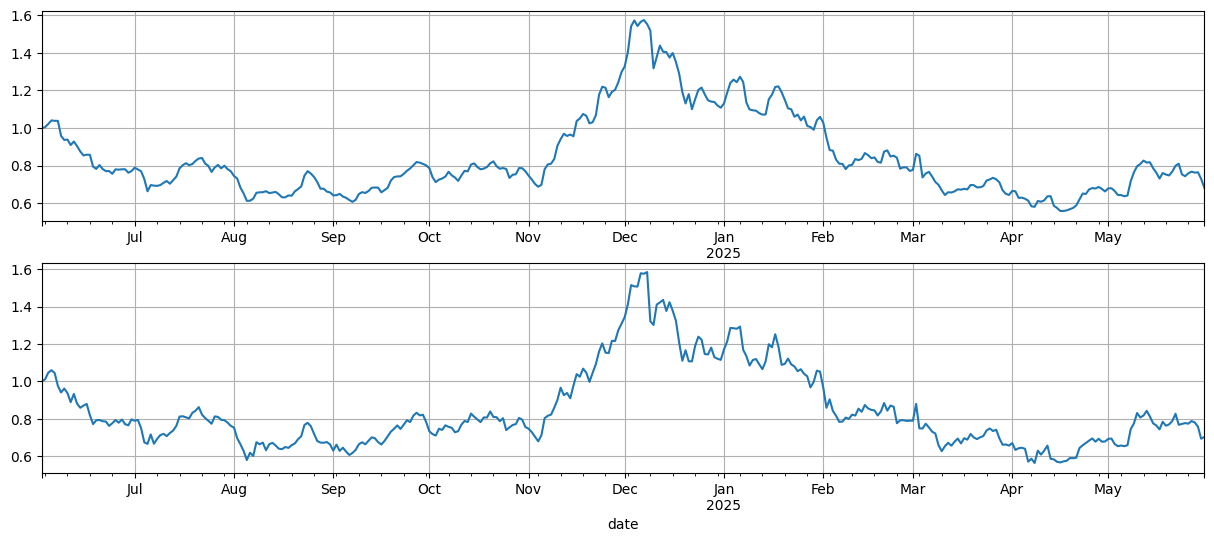

In [369]:
start_time = '2024-06-01'
end_time = '2025-06-01'
close_filter = close[(close.index > start_time) & (close.index < end_time)]
open_filter = open[(open.index > start_time) & (open.index < end_time)]
high_filter = high[(high.index > start_time) & (high.index < end_time)]
low_filter = low[(low.index > start_time) & (low.index < end_time)]
volume_filter = volume[(volume.index > start_time) & (volume.index < end_time)]
amount_filter = amount[(amount.index > start_time) & (amount.index < end_time)]
vwap_filter = vwap[(vwap.index > start_time) & (vwap.index < end_time)]
return_filter = return_[(return_.index > start_time) & (return_.index < end_time)]

benchmark_open_filter = open_filter.mean(axis=1)
benchmark_close_filter = close_filter.mean(axis=1)
volatility = return_filter.rolling(window=10, min_periods=5).std()


import matplotlib.pyplot as plt
_, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))
high_norm = high_filter/high_filter.bfill().iloc[0] 
close_norm = close_filter/close_filter.bfill().iloc[0] 
high_norm.mean(axis=1).plot(ax=ax1, figsize=(15,6),grid=True)
close_norm.mean(axis=1).plot(ax=ax2, figsize=(15,6),grid=True);

### 5. Define Factor

In [370]:
import Alpha101 as alpha101

df_data = {
    'open' : open_filter,
    'close' : close_filter,
    'high' : high_filter,
    'low' : low_filter,
    'volume' : volume_filter, 
}

alpha_all_in_one_101 = alpha101.Alphas101(df_data)


import Alpha191 as alpha191

df_data = {
    'open' : open_filter,
    'close' : close_filter,
    'high' : high_filter,
    'low' : low_filter,
    'volume' : volume_filter, 
    'vwap' : vwap_filter,
    'amount': amount_filter,
    'benchmark_open': benchmark_open_filter,
    'benchmark_close': benchmark_close_filter
}

alpha_all_in_one_191 = alpha191.Alphas191(df_data)




### 6. AlphaLens Data Adaptor

In [371]:
method = getattr(alpha_all_in_one_101, 'alpha031')
single_alpha = method() 



# 将因子转换为Alphalens需要的MultiIndex格式
factor = single_alpha.stack()
factor.index.names = ['date', 'asset']
factor = factor.dropna()  # 清理缺失值
price = close_filter

In [372]:
import alphalens
factor_data = alphalens.utils.get_clean_factor_and_forward_returns(
    factor=factor,
    prices=price,
    periods=(1,),
    quantiles=10
)
factor_data

Dropped 0.3% entries from factor data: 0.3% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


1D    factor  \
date                      asset                                  
2024-06-21 00:00:00+00:00 KAS/USDT:USDT     0.053725  0.755710   
                          AVAX/USDT:USDT   -0.067965  0.950162   
                          QTUM/USDT:USDT    0.002358  0.983449   
                          DASH/USDT:USDT    0.014749  0.949422   
                          CHZ/USDT:USDT    -0.004641  1.005178   
...                                              ...       ...   
2025-05-30 00:00:00+00:00 PENDLE/USDT:USDT  0.012765  1.913669   
                          TRX/USDT:USDT    -0.005172  1.366906   
                          PYTH/USDT:USDT    0.044777  1.942446   
                          BLUR/USDT:USDT    0.010030 -0.237410   
                          SFP/USDT:USDT     0.004737  0.194245   

                                            factor_quantile  
date                      asset                              
2024-06-21 00:00:00+00:00 KAS/USDT:USDT                   3  
                          AVAX/USDT:USDT                  7  
                          QTUM/USDT:USDT                  7  
                          DASH/USDT:USDT                  7  
                          CHZ/USDT:USDT                   8  
...                                                     ...  
2025-05-30 00:00:00+00:00 PENDLE/USDT:USDT                6  
                          TRX/USDT:USDT                   3  
                          PYTH/USDT:USDT                  6  
                          BLUR/USDT:USDT                  1  
                          SFP/USDT:USDT                   2  

[41382 rows x 3 columns]

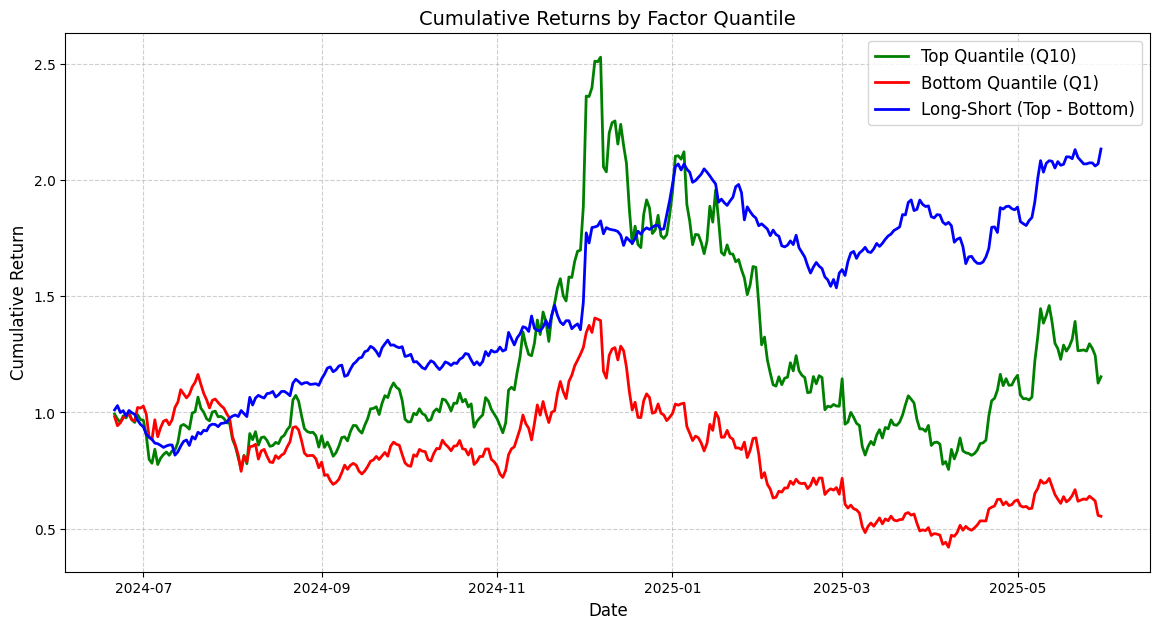

In [373]:
mean_return_by_q, _ = alphalens.performance.mean_return_by_quantile(
    factor_data,
    by_date=True,  # 按日期计算
    demeaned=False,  # 是否对收益去均值（Long-Short 需设为 True）
    group_adjust=False
)
top_quantile_daily = mean_return_by_q.loc[10]  # 最高分组每日收益
bottom_quantile_daily = mean_return_by_q.loc[1]  # 最低分组每日收益
long_short_daily = top_quantile_daily - bottom_quantile_daily # 计算 Long-Short 组合（最高减最低）

# 计算累计收益
top_cumulative = alphalens.performance.cumulative_returns(top_quantile_daily)
bottom_cumulative = alphalens.performance.cumulative_returns(bottom_quantile_daily)
long_short_cumulative = alphalens.performance.cumulative_returns(long_short_daily)
top_cumulative
top_quantile_daily

# 绘制图表
plt.figure(figsize=(14, 7))
plt.plot(top_cumulative, 'g', label='Top Quantile (Q10)', linewidth=2)
plt.plot(bottom_cumulative, 'r', label='Bottom Quantile (Q1)', linewidth=2)
plt.plot(long_short_cumulative, 'b', label='Long-Short (Top - Bottom)', linewidth=2)

# 设置标题和标签
plt.title('Cumulative Returns by Factor Quantile', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Cumulative Return', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

In [374]:
import numpy as np
mean_return_by_q, _ = alphalens.performance.mean_return_by_quantile(
    factor_data,
    by_date=True, 
    demeaned=False,
    group_adjust=False
)
top_quantile_daily = mean_return_by_q.loc[10]  # 最高分组每日收益
bottom_quantile_daily = mean_return_by_q.loc[1]  # 最低分组每日收益
long_short_daily = top_quantile_daily - bottom_quantile_daily # 计算 Long-Short 组合（最高减最低）
long_short_cumulative = alphalens.performance.cumulative_returns(long_short_daily)
mean_return = long_short_daily.mean()
std_dev = long_short_daily.std()
sharpe_ratio = (mean_return) / std_dev * np.sqrt(365)
SP_table = pd.DataFrame([{
            "AlphaName":'xxx',
            "SP":float(sharpe_ratio),
             "Pro Daily Mean":float(mean_return),
            "Pro Total":float(long_short_cumulative.iloc[-1])
        }])
SP_table

,AlphaName,SP,Pro Daily Mean,Pro Total
0,xxx,2.124712,0.002436,2.133716


Quantiles Statistics


,min,max,mean,std,count,count %
factor_quantile,,,,,,
1,-0.985612,1.476260,-0.392318,0.379256,4311,10.417573
2,-0.714583,1.899281,0.100289,0.553650,4143,10.011599
3,-0.488550,1.964029,0.420559,0.649298,4060,9.811029
4,-0.262322,2.014388,0.716269,0.705561,4145,10.016432
5,-0.120617,2.079137,0.979826,0.728667,4144,10.014016
6,-0.024462,2.188679,1.238866,0.719342,4061,9.813445
7,0.013879,2.333475,1.503261,0.662904,4089,9.881108
8,0.071151,2.530947,1.818893,0.534768,4103,9.914939
9,0.143714,2.751997,2.147338,0.370657,4088,9.878691


Returns Analysis


,1D
Ann. alpha,0.231
beta,0.039
Mean Period Wise Return Top Quantile (bps),10.960
Mean Period Wise Return Bottom Quantile (bps),-13.404
Mean Period Wise Spread (bps),24.364


<Figure size 640x480 with 0 Axes>

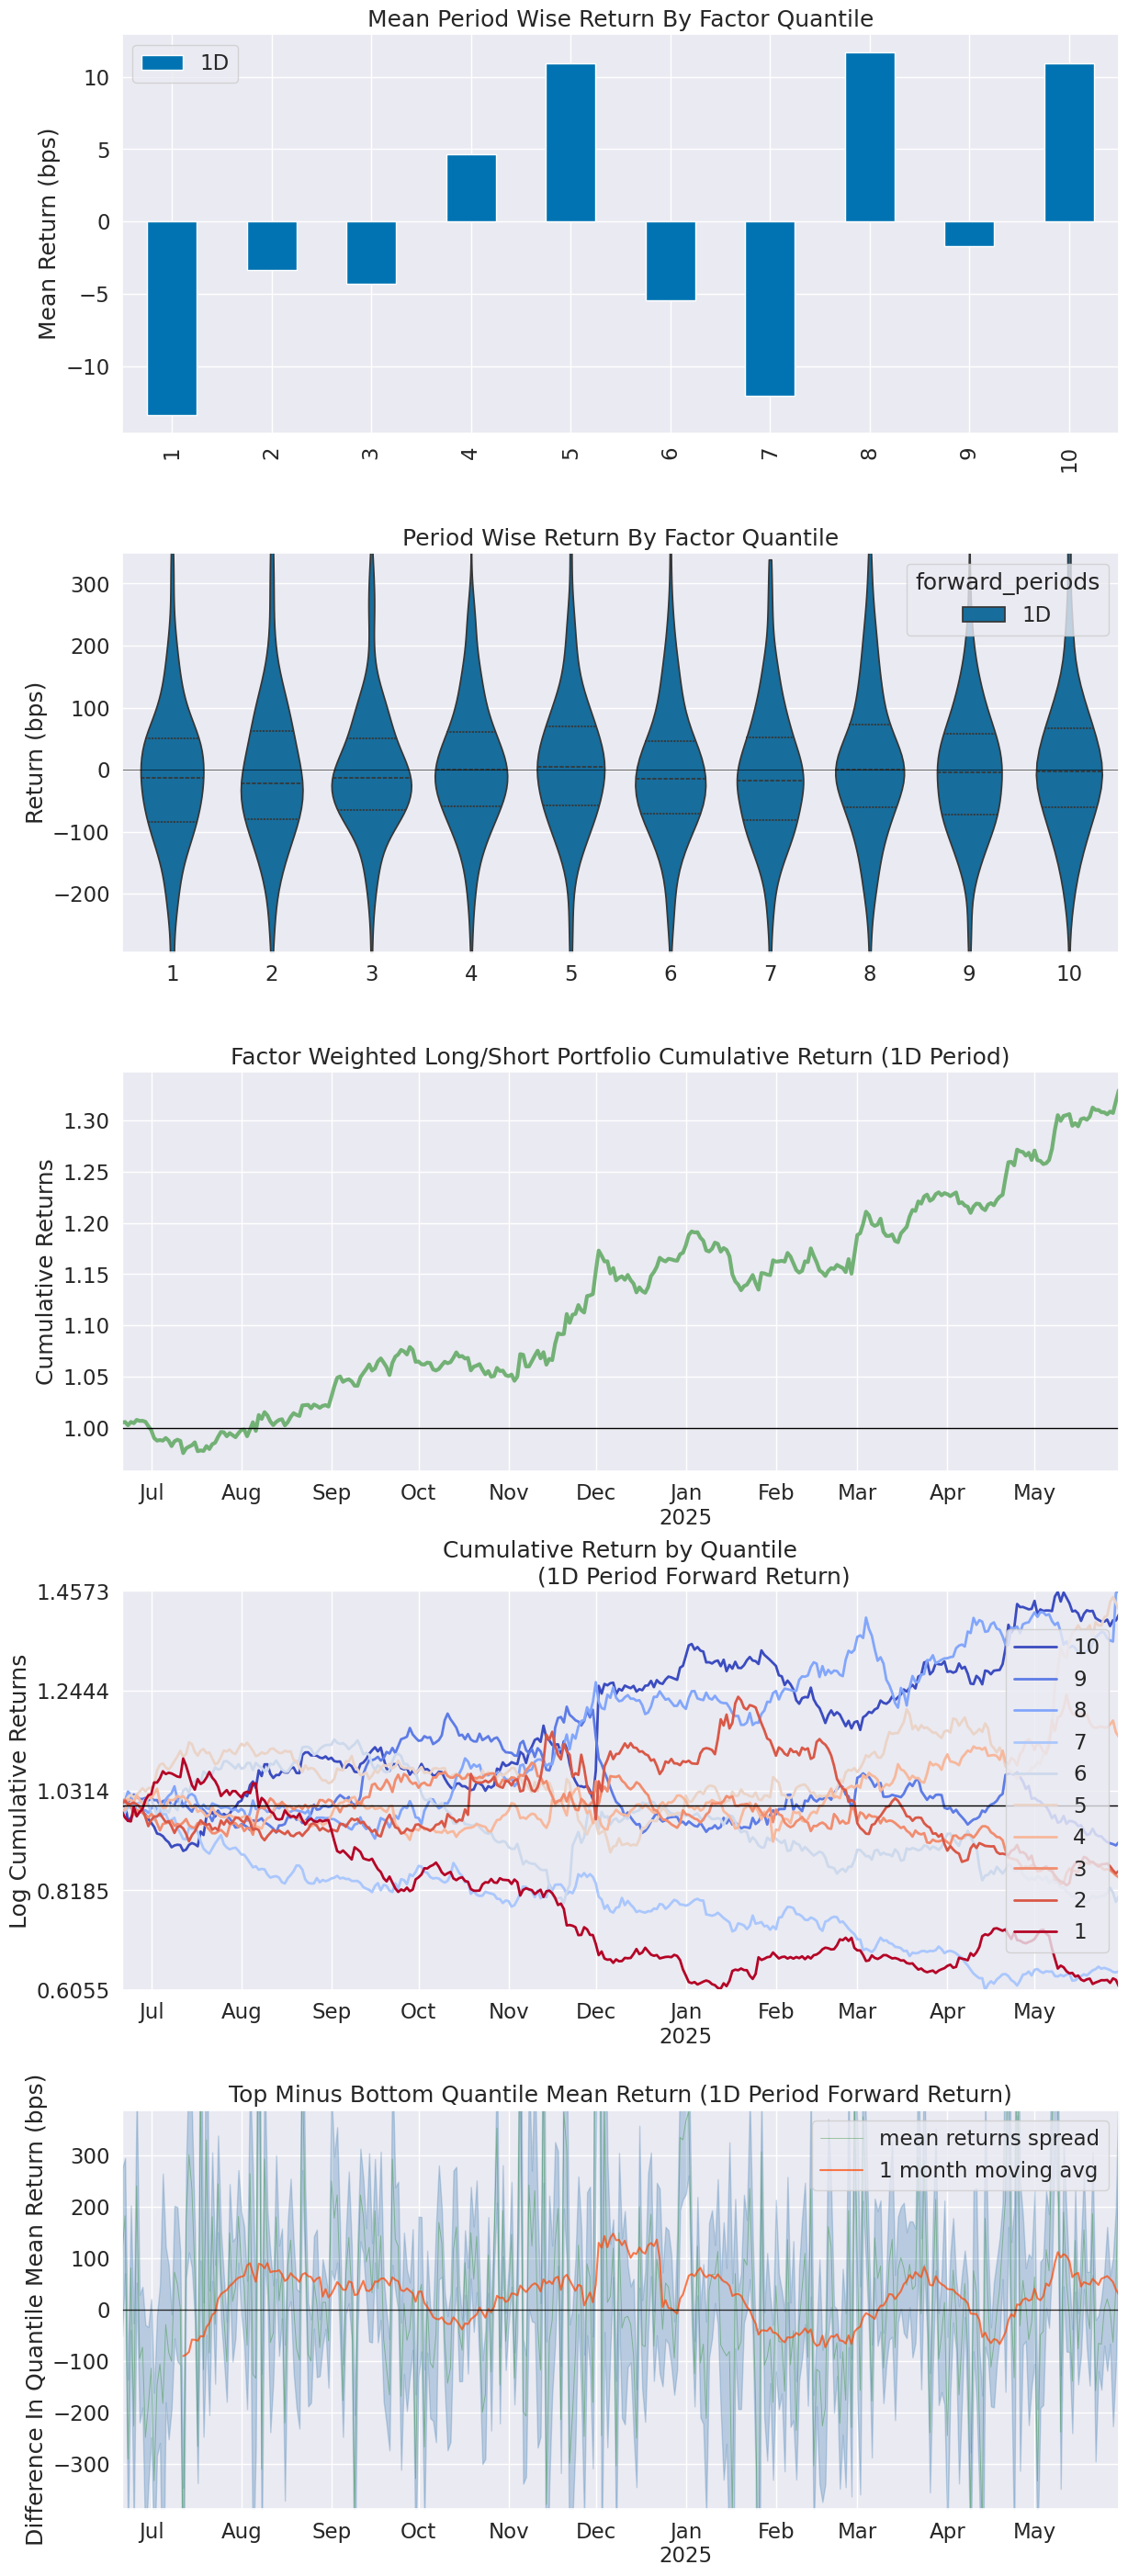

Information Analysis


,1D
IC Mean,0.013
IC Std.,0.128
Risk-Adjusted IC,0.103
t-stat(IC),1.913
p-value(IC),0.057
IC Skew,-0.037
IC Kurtosis,0.013


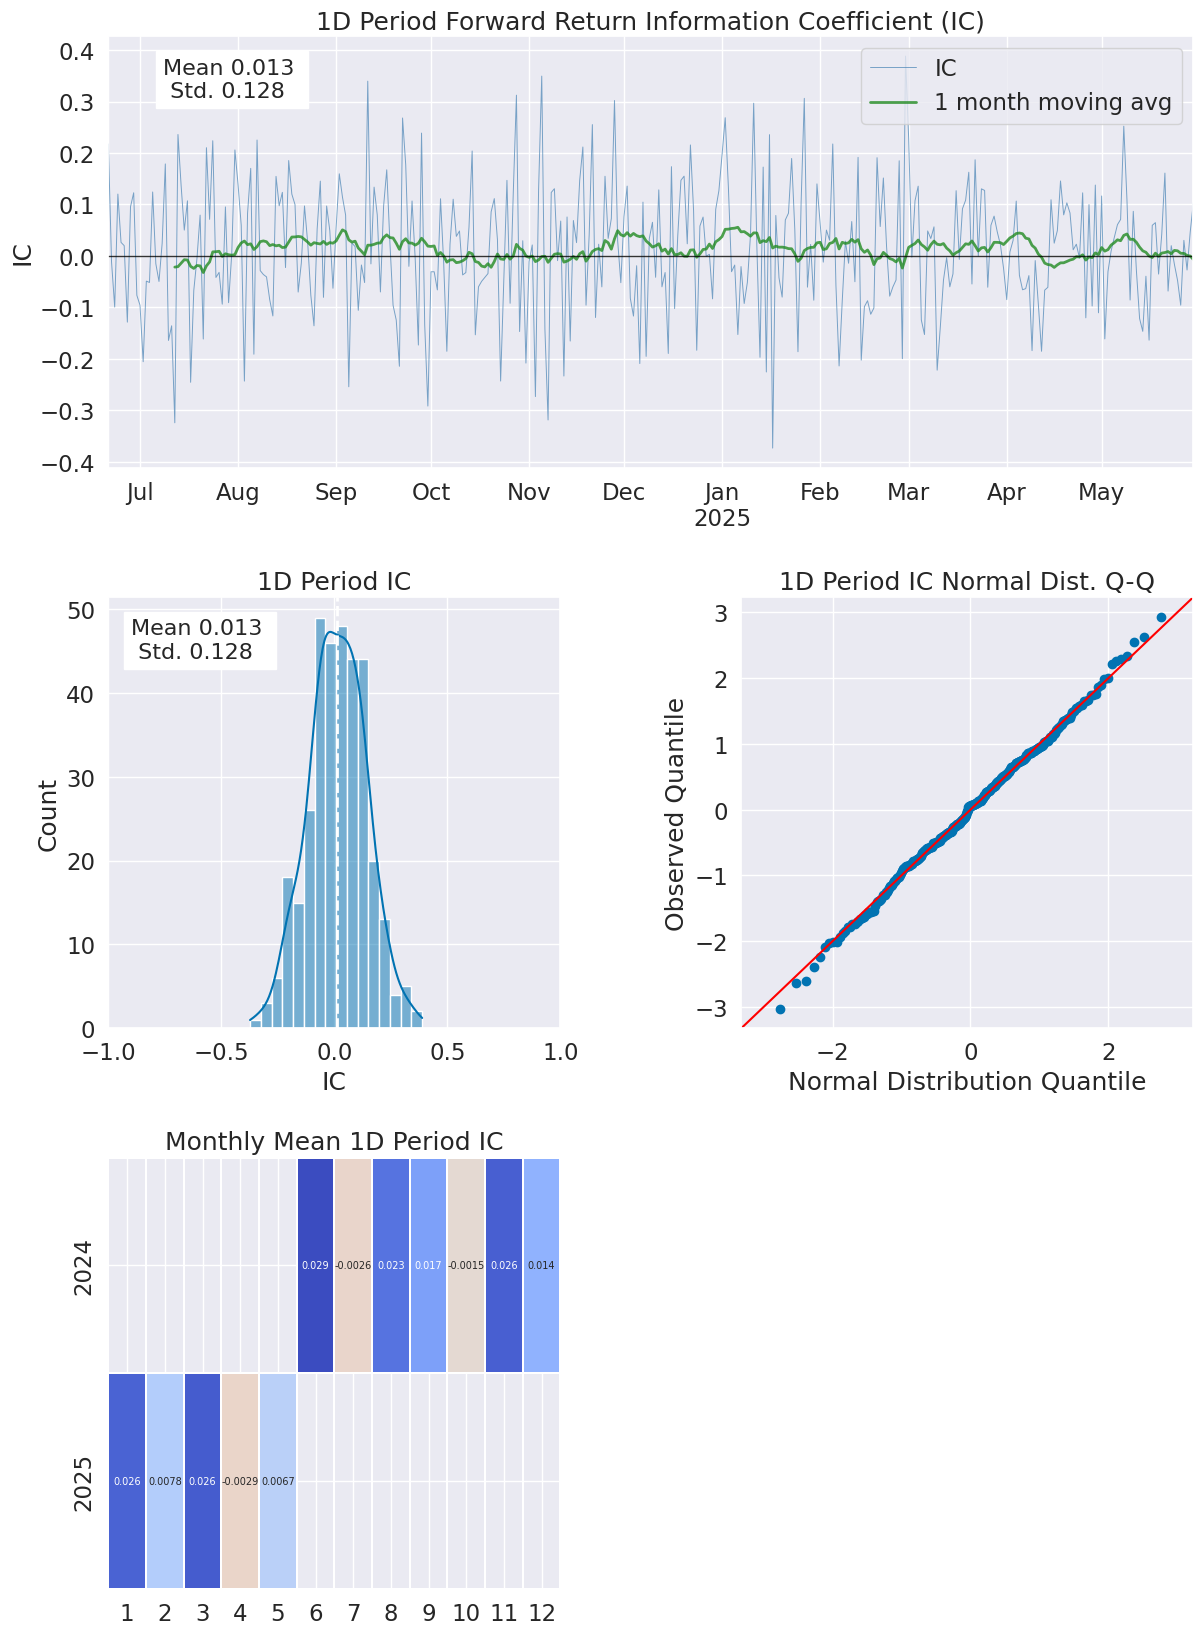

Turnover Analysis


,1D
Quantile 1 Mean Turnover,0.419
Quantile 2 Mean Turnover,0.610
Quantile 3 Mean Turnover,0.675
Quantile 4 Mean Turnover,0.705
Quantile 5 Mean Turnover,0.716
Quantile 6 Mean Turnover,0.721
Quantile 7 Mean Turnover,0.704
Quantile 8 Mean Turnover,0.662
Quantile 9 Mean Turnover,0.599
Quantile 10 Mean Turnover,0.407


,1D
Mean Factor Rank Autocorrelation,0.737


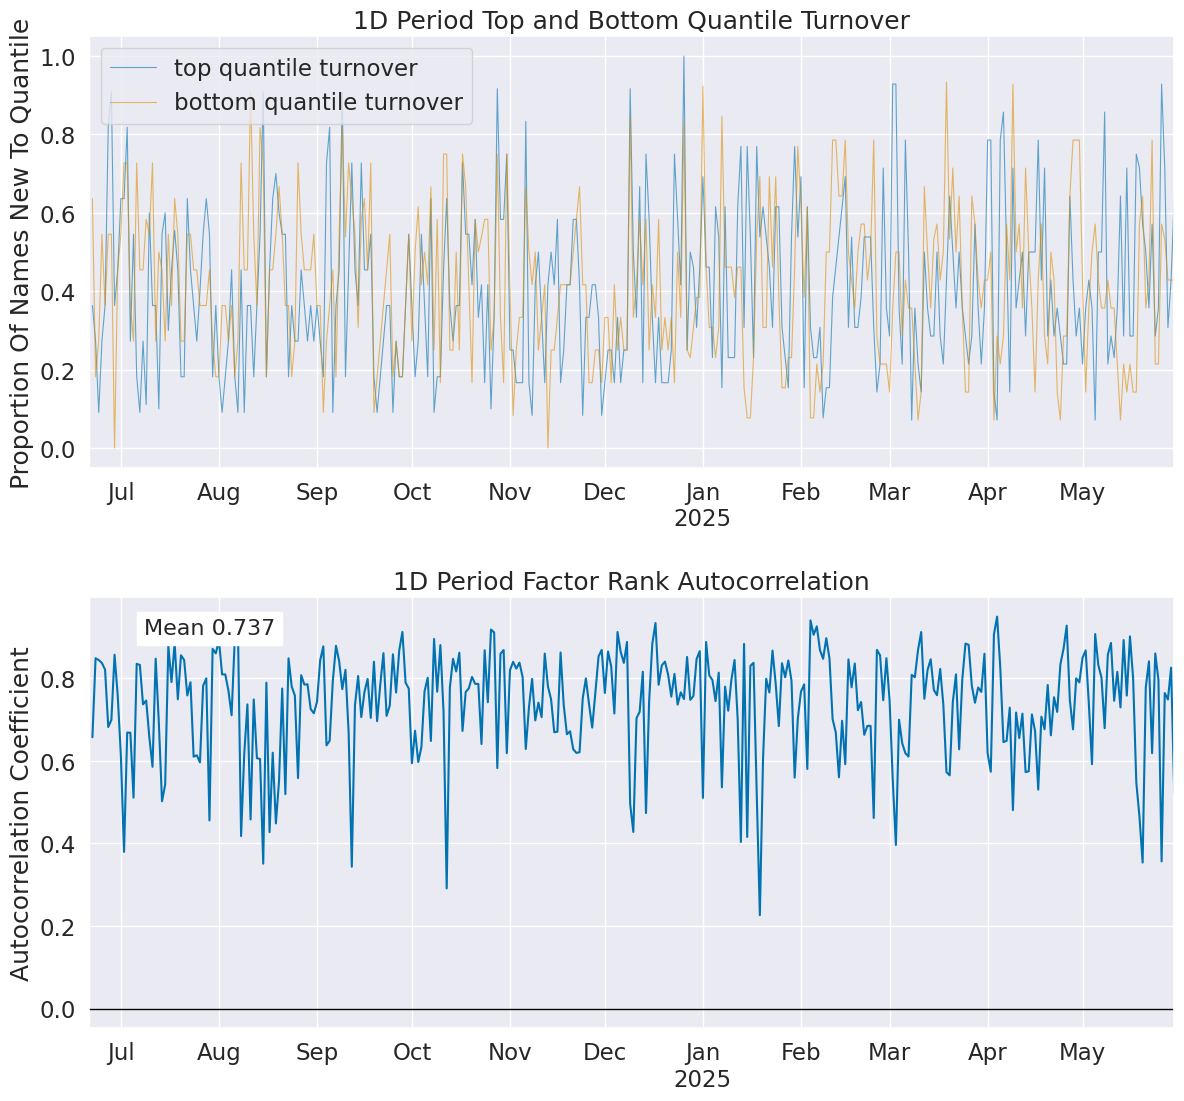

In [375]:
alphalens.tears.create_full_tear_sheet(
    factor_data,
    long_short=True,
)